<a href="https://colab.research.google.com/github/rosez/Springboard/blob/master/Capstone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone2 : Apparel Images

Evaluate various models and image sizes for apparel dataset:

* Specify model suffix (in **main** section)

 

        > Models are defined in **x10MakeModel** section




* Specify image size in **x000setup** section



**NOTE:**  Initial Models: 1, 2, 6 (some other were defined when having resources issues due to complexity and use of large image size(494))



# Import tf to find out version



In [0]:
import tensorflow as tf


In [2]:
print(tf.__version__)

2.2.0-rc3


In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

# Connect to Google drive


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
!ls "/content/gdrive/My Drive/Capstone2/data/"

apparelSmallTest  apparelSmallTrain  apparelSmallValidate  capstone2.ipynb


# Moving on ...done with CoLab stuf

## From x000setup.py



In [0]:
import os

import tensorflow as tf

import matplotlib.pyplot as plt

 
from tensorflow.keras.callbacks import EarlyStopping


## Directory Paths

In [7]:
path = "/content/gdrive/My Drive/Capstone2/data/"
srcdir = path + 'apparel-images-dataset\\'

trainingdir = path + 'apparelSmallTrain'
testdir = path + 'apparelSmallTest'
validdir = path + 'apparelSmallValidate'
print(trainingdir)

/content/gdrive/My Drive/Capstone2/data/apparelSmallTrain


In [0]:

def getHistoryPath():
    #history_path = 'C:\\Users\\rozoe\\jy\\ch10ML\\tensorflow\\capstone2\\history\\'
    history_path = "/content/gdrive/My Drive/Capstone2/history/"
    return history_path  


## Parameters

In [11]:

# =============================================================================
# inLine Parameters
# =============================================================================



num_classes = 10
num_epochs = 100
epochs = num_epochs

# input image dimensions
img_rows, img_cols = 150, 150
input_shape = (img_rows, img_cols, 3)

# learning_rate

#learning_rate = 0.001
learning_rate = 0.0001

#batch_size for model.fit
batch_size = 32  
    



target_size = input_shape[:2]

 
xoptimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
 
print(num_classes, input_shape, learning_rate, num_epochs, batch_size)

10 (150, 150, 3) 0.0001 100 32


## Callbacks


In [0]:
# =============================================================================
# Callbacks
# =============================================================================

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8,
                   restore_best_weights=True)

callbacks = [es]


# Function Definitions

## Data Generators

In [0]:
def dataGenerators(target_size):
    #!!import tensorflow as tf
    import keras_preprocessing
    from keras_preprocessing import image
    from keras_preprocessing.image import ImageDataGenerator
    
    TRAINING_DIR = trainingdir
    training_datagen = ImageDataGenerator(
          rescale = 1./255,
    	  rotation_range=40,
          width_shift_range=0.2,
          height_shift_range=0.2,
          shear_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')
    
    
    VALIDATION_DIR = validdir
    validation_datagen = ImageDataGenerator(rescale = 1./255)

    
    train_generator = training_datagen.flow_from_directory(
    	TRAINING_DIR,
    	target_size=target_size,
        color_mode='rgb',
    	class_mode='categorical'
    )
    
    validation_generator = validation_datagen.flow_from_directory(
    	VALIDATION_DIR,
    	target_size=target_size,
        color_mode='rgb',
    	class_mode='categorical'
    )

    
    return train_generator, validation_generator
    


def testDataGenerator(target_size):
    #!!import tensorflow as tf
    import keras_preprocessing
    from keras_preprocessing import image
    from keras_preprocessing.image import ImageDataGenerator
    
 
    TEST_DIR = testdir
    test_datagen = ImageDataGenerator(rescale = 1./255)
    
    
    test_generator = test_datagen.flow_from_directory(
    	TEST_DIR,
    	target_size=target_size,
        color_mode='rgb',
    	class_mode='categorical'
    )
    
    return test_generator


    

## from pickle, plot


In [0]:


def pickleHist(history, filename):
    import pickle
 
    pfilename = filename + '.pkl'
    with open(pfilename, 'wb') as file_pi:
            pickle.dump(history.history, file_pi)



def pickleEval(eval_output, filename):
    import pickle
 
    pfilename = filename + '.pkl'
    with open(pfilename, 'wb') as file_pi:
            pickle.dump(eval_output, file_pi)           
        
def plotModelHistory(history, suffix):
# Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model{0} accuracy'.format(suffix))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model{0} loss'.format(suffix))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def plotSaveModelHistory(history, saveInfo, history_path):
# Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model{0} accuracy'.format(saveInfo))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    
    savefile = history_path + 'Accuracy' + saveInfo + '.pdf'
    plt.savefig(savefile)
    plt.show()
 
    
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model{0} loss'.format(saveInfo))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    savefile = history_path + 'Loss' + saveInfo + '.pdf'
    plt.savefig(savefile)
    plt.show()
    

## x10MakeModel.py
Make model based on suffix parameter


In [0]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 17 12:29:25 2020

@author: rozoe
"""



def make_model(suffix, num_classes, input_shape):

#    num_classes, input_shape, learning_rate, epochs = getGlobalParms()
    if suffix==1:
        print('model1')
    
        model = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
        #    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
        #    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        return model

 

    ################### model 2: add another conv/pool layer ################
    # del model2

    elif (suffix==2):
        print('model2')
 
        model2c = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
        #    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        return model2c


################### model 3: the original overfitted model ################
    elif (suffix==3): 
        print('model3')
        

         
        model3 = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        return model3
 


################### model 4: complex model inspired by asifbala (from Ankur) ################
    elif suffix==4:
 
        model4 = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
        #    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
            tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
            tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        
        return model4
 
    elif suffix==5:
 
################### model 5: pare down m4...too much memory ################
# two conv layers before pooling
        model5 = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
        #    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
        #    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        #    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        
     
        return model5
        
    elif suffix==6:
################### model 6: pare down m5, since it crashes the pc ################
# two conv layers before pooling

 
        model6 = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
        #    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
        #    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        #    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        
        return model6
     
    elif suffix==7:
################### model 7: pare down even further  ################
# redo first model, but no pooling after first step 
# ...exceeds memory during make_model()
        model7 = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
        #    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
        #    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
        #    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        #    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        
        return model7





 
# =============================================================================
#     elif suffix==10:
# 
#     ################### model 10: change the syntax to the viz format #############
#     # redo first model, but no pooling after first step
#         
#         from keras.models import Sequential
#         from keras.layers import Conv2D
#         from keras.layers import MaxPooling2D
#         from keras.layers import Flatten
#         from keras.layers import Dense
#         from keras.layers import Dropout
#         
#         classifier10 = Sequential()
#         #
#          
#         # Step 1 - Convolution
#         
#         classifier10.add(Conv2D(32, (3, 3), padding='same', input_shape = input_shape, activation = 'relu'))
#         classifier10.add(Conv2D(32, (3, 3), activation='relu'))
#         classifier10.add(MaxPooling2D(pool_size=(2, 2)))
#         classifier10.add(Dropout(0.5)) # antes era 0.25
#         # Adding a second convolutional layer
#         classifier10.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
#         classifier10.add(Conv2D(64, (3, 3), activation='relu'))
#         classifier10.add(MaxPooling2D(pool_size=(2, 2)))
#         classifier10.add(Dropout(0.5)) # antes era 0.25
#         # Adding a third convolutional layer
#         ## classifier10.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
#         ## classifier10.add(Conv2D(64, (3, 3), activation='relu'))
#         ## classifier10.add(MaxPooling2D(pool_size=(2, 2)))
#         ## classifier10.add(Dropout(0.5)) # antes era 0.25
#         # Step 3 - Flattening
#         classifier10.add(Flatten())
#         # Step 4 - Full connection
#         classifier10.add(Dense(units = 512, activation = 'relu'))
#         classifier10.add(Dropout(0.5)) 
#         classifier10.add(Dense(units = num_classes, activation = 'softmax'))
#         
#         classifier10.summary()
#         
#         classifier10.compile(optimizer = 'adam',
#                            loss = 'categorical_crossentropy', 
#                            metrics = ['accuracy'])
#         
#         histEx10Epoch1d10 = classifier10.fit_generator(train_generator,
#                                            steps_per_epoch = 100,
#                                            epochs = 10,
#         #                                  callbacks=[checkpointer],
#                                            validation_data = validation_generator,
#                                            validation_steps = 50)
#         return classifier10
# '''    
# 
# 
# =============================================================================
 
    elif suffix==8:
        print('model 8')
    ################### model 8: add additional layer to model 6 ################
    # two conv layers before pooling
    #del model8
     
        model8 = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
        #    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        
        return model8

 

 
    elif suffix==9:
        ################### model 9: model 6 * 2 num_channels ################
        # two conv layers before pooling
        
        #del model8
        model9 = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
        #    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
        #    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        #    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        
        return model9
        
        ## model 9: waaay overfit...acc: .11 / .0786
    
    
    elif suffix==11:
        print('model11')
    
        model = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
        #    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
        #    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        return model

    
   
 
    elif suffix==12:
        ################### model 12: model 10 in keras################
        # two conv layers before pooling
        
 
        model12 = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
        #    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
        #    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        #    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        
        return model12
        
        ## model 9: waaay overfit...acc: .11 / .0786
    
    
 
################### model 13: model 2 + 4*dense ################
 
    elif (suffix==13):
        print('model13')
 
        model13 = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
        #    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        return model13

        
    elif suffix==16:
        print('model' , suffix)
################### model 6: pare down m5, since it crashes the pc ################
# two conv layers before pooling


 
        model16 = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
        #    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
        #    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        #    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        
        return model16

    elif suffix==101:
        # model 1 w/no dropout
        print('model101')
    
        model = tf.keras.models.Sequential([
            # Note the input shape is the desired size of the image 150x150 with 3 bytes color
            # This is the first convolution
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
            tf.keras.layers.MaxPooling2D(2, 2),
            # The second convolution
        #    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The third convolution
        #    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        #    tf.keras.layers.MaxPooling2D(2,2),
            # The fourth convolution
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            # Flatten the results to feed into a DNN
            tf.keras.layers.Flatten(),
            #tf.keras.layers.Dropout(0.5),
            # 512 neuron hidden layer
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
        return model



    else:
        print('did not find suffix')

    
################################ END MODEL DEFINITION #####################














## x20ProcessModel.py

compile and fit model 

==> return model and history object


In [0]:


def processModel(model, suffix, num_epochs, 
                 xoptimizer, 
                 train_generator, validation_generator,
                 batch_size,
                 callbacks=None):
    
    model.compile(loss = 'categorical_crossentropy', optimizer=xoptimizer, metrics=['accuracy'])
    
    
    
    # calculate step sizes    
    #batch_size = 32
    steps_per_epoch = int(train_generator.samples / batch_size)
    validation_steps = int(validation_generator.samples / batch_size)
    test_steps = int(test_generator.samples / batch_size)
    
    
    #es = getEarlyStopping()
    ## notation epock1d20 ...epochs 1 dotdotdot 20 ==> 1 thru 20
    history  = model.fit(train_generator, epochs=num_epochs, 
                         validation_data = validation_generator,
                         steps_per_epoch=steps_per_epoch,
                         validation_steps=validation_steps,
                         batch_size=batch_size,
                         verbose = 1, callbacks=callbacks)
    # plot History
    #plotModelHistory(history, suffix)

    return model, history




# main.py

In [17]:
#history_path = 'C:\\Users\\rozoe\\jy\\ch10ML\\tensorflow\\capstone2\\history\\'
history_path = getHistoryPath()
print(history_path)

train_generator, validation_generator = dataGenerators(target_size)

test_generator = testDataGenerator(target_size)


/content/gdrive/My Drive/Capstone2/history/
Found 5055 images belonging to 10 classes.
Found 1092 images belonging to 10 classes.
Found 1095 images belonging to 10 classes.


In [18]:
 
input_shape

(150, 150, 3)

SaveInfo:  M101Pix150
model101
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               10616960  
_________________________________________________________________
dense_1 (Dense)          

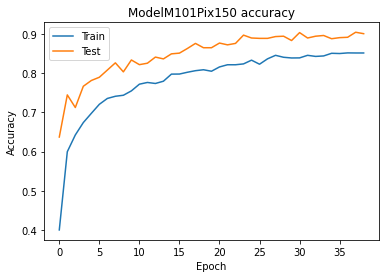

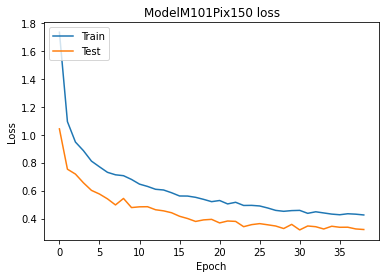

*** evaluating Model ***
34/34 [==============================] - 349s 10s/step - loss: 0.3170 - accuracy: 0.8778
[0.31697139143943787, 0.8777573704719543]
/content/gdrive/My Drive/Capstone2/history/evalM101Pix150
*** saving model  ***
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Capstone2/saved_model/modelM101Pix150/assets


In [19]:
# =============================================================================
# Run Models
# =============================================================================

# Model suffix 
suffix = 101


# Label saved objects with model suffix and image size
saveInfo = 'M' + str(suffix) + 'Pix' + str(img_cols)
print('SaveInfo: ', saveInfo)

model = make_model(suffix, num_classes, input_shape)
model.summary()

model, history = processModel(model, saveInfo, 100, 
                              xoptimizer, 
                              train_generator, validation_generator,
                              batch_size,
                              callbacks=callbacks)


print('*** pickling history ***')
pickleHist(history, history_path + 'history' + saveInfo)
#pickleHist(history, history_path + 'historyLR1e4Epochs21d30Model' + str(suffix))


print('*** plotting/saving history figures ***')
# plot History
#plotModelHistory(history, saveInfo)
plotSaveModelHistory(history, saveInfo, history_path)




print('*** evaluating Model ***')
# Model Evaluation

test_steps = int(test_generator.samples / batch_size)
eval_output = model.evaluate(test_generator, steps=test_steps)         
print(eval_output)



# Save Evaluation information

evalfile = history_path + 'eval' + saveInfo
print(evalfile)
#pickleEval(eval_output, history_path + 'eval' + str(suffix))
pickleEval(eval_output, evalfile)



print('*** saving model  ***')

# Save the entire model as a SavedModel.

savedmodeldir = '/content/gdrive/My Drive/Capstone2/saved_model/'

#!mkdir -p savedmodeldir
#!mkdir -p '/content/gdrive/My Drive/Capstone2/saved_model'
modelpath =  savedmodeldir + 'model' + saveInfo
model.save(modelpath)




# Results

![alt text](https://)




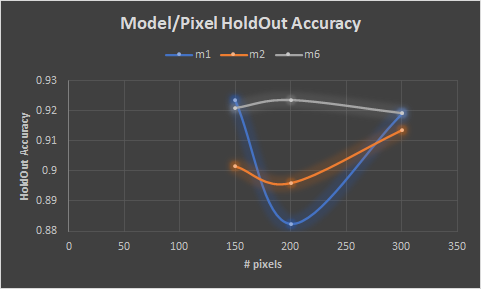